In [13]:
import pandas as pd
df = pd.read_csv('../../data/preprocessed_AQI_data.csv')
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,130,10126,51,2,1,0,36,0,0,0,51,2,44.7444,44.2031
1,22,10140,41,0,1,0,5,0,1,0,41,0,-5.2900,-44.4900
2,75,10163,66,2,1,0,39,0,2,0,66,2,37.1667,15.1833
3,123,10185,34,0,1,0,34,0,0,0,20,0,53.0167,20.8833
4,166,10243,54,2,1,0,14,0,11,0,54,2,16.1005,-88.8074


In [14]:
from sklearn.model_selection import train_test_split

# shuffle the data before splitting
df_shuffled = df.sample(frac=1, random_state=19)  
X = df_shuffled.drop(["AQI Category"], axis=1)
y = df_shuffled["AQI Category"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=22
)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(2845, 13) (11384, 13)
(2845,) (11384,)


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_classifier = DecisionTreeClassifier(random_state=19)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)


In [16]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 1.0


In [17]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5301
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00      4741
           3       1.00      1.00      1.00       618
           4       1.00      1.00      1.00       588
           5       1.00      1.00      1.00        95

    accuracy                           1.00     11384
   macro avg       1.00      1.00      1.00     11384
weighted avg       1.00      1.00      1.00     11384



In [18]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = dt_classifier.predict(X_test)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)




Confusion Matrix:
[[5301    0    0    0    0    0]
 [   0   41    0    0    0    0]
 [   0    0 4741    0    0    0]
 [   0    0    0  618    0    0]
 [   0    0    0    0  588    0]
 [   0    0    0    0    0   95]]


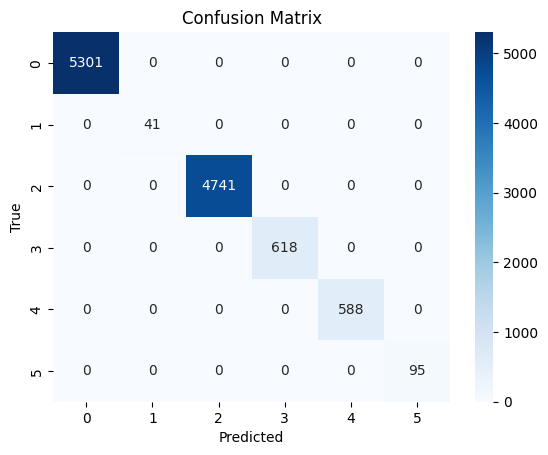

In [19]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [20]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5301
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00      4741
           3       1.00      1.00      1.00       618
           4       1.00      1.00      1.00       588
           5       1.00      1.00      1.00        95

    accuracy                           1.00     11384
   macro avg       1.00      1.00      1.00     11384
weighted avg       1.00      1.00      1.00     11384



In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score

# here we define different scorers metrics
scorer_f1 = make_scorer(f1_score, average='weighted')
scorer_precision = make_scorer(precision_score, average='weighted', zero_division=1)
scorer_recall = make_scorer(recall_score, average='weighted')
scorer_accuracy = make_scorer(accuracy_score)

# Cwe save them in a dict for easier accessing
scorers = {'f1': scorer_f1, 'precision': scorer_precision, 'accuracy': scorer_accuracy, 'recall': scorer_recall}
scores_results : dict = {}
for scorer_name, scorer in scorers.items():
    scores = cross_val_score(dt_classifier, X_train, y_train, cv=7, scoring=scorer)
    print(f"{scorer_name.capitalize()} scores:", scores)
    scores_results[scorer_name] = round(scores.mean(), 4)
    print(f"{scorer_name.capitalize()} mean:", round(scores.mean(), 4),'\n')

F1 scores: [0.99649    0.99754184 0.99727    1.         1.         1.
 1.        ]
F1 mean: 0.9988 

Precision scores: [0.99815725 0.99764537 0.9980344  1.         1.         1.
 1.        ]
Precision mean: 0.9991 

Accuracy scores: [0.997543 0.997543 0.997543 1.       1.       1.       1.      ]
Accuracy mean: 0.9989 

Recall scores: [0.997543 0.997543 0.997543 1.       1.       1.       1.      ]
Recall mean: 0.9989 



In [32]:
import pandas as pd
scores_df = pd.DataFrame.from_dict(scores_results, orient='index', columns=['Scores'])
scores_df

,Scores
f1,0.9988
precision,0.9991
accuracy,0.9989
recall,0.9989
